In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [16]:
df = pd.read_csv("AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
df = df2.set_index('Date')

In [17]:
df1 = df2.set_index('Date')

In [18]:
data = df2.set_index('Date')

In [19]:
df

,Price
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69
...,...
2023-12-22,193.60
2023-12-26,193.05
2023-12-27,193.15


In [20]:
df["returns"] = np.log(df.div(df.shift(1)))

In [21]:
df

,Price,returns
Date,,
2019-01-02,39.48,NaN
2019-01-03,35.55,-0.104854
2019-01-04,37.07,0.041868
2019-01-07,36.98,-0.002431
2019-01-08,37.69,0.019018
...,...,...
2023-12-22,193.60,-0.005563
2023-12-26,193.05,-0.002845
2023-12-27,193.15,0.000518


In [22]:
df.dropna(inplace = True)

In [23]:
df

,Price,returns
Date,,
2019-01-03,35.55,-0.104854
2019-01-04,37.07,0.041868
2019-01-07,36.98,-0.002431
2019-01-08,37.69,0.019018
2019-01-09,38.33,0.016838
...,...,...
2023-12-22,193.60,-0.005563
2023-12-26,193.05,-0.002845
2023-12-27,193.15,0.000518


In [24]:
df.returns.cumsum().apply(np.exp)

,returns
Date,
2019-01-03,0.900456
2019-01-04,0.938956
2019-01-07,0.936677
2019-01-08,0.954661
2019-01-09,0.970871
...,...
2023-12-22,4.903749
2023-12-26,4.889818
2023-12-27,4.892351


In [25]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [26]:
df

,Price,returns,creturns
Date,,,
2019-01-03,35.55,-0.104854,0.900456
2019-01-04,37.07,0.041868,0.938956
2019-01-07,36.98,-0.002431,0.936677
2019-01-08,37.69,0.019018,0.954661
2019-01-09,38.33,0.016838,0.970871
...,...,...,...
2023-12-22,193.60,-0.005563,4.903749
2023-12-26,193.05,-0.002845,4.889818
2023-12-27,193.15,0.000518,4.892351


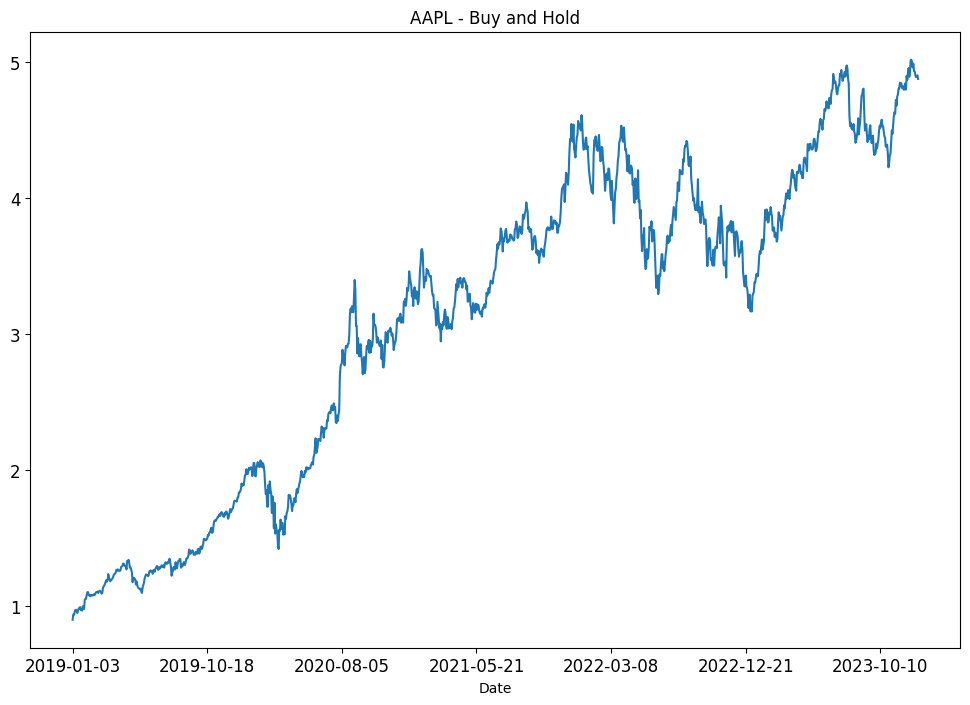

In [27]:
df.creturns.plot(figsize = (12, 8), title = "AAPL - Buy and Hold", fontsize = 12)
plt.show()

In [28]:
df

,Price,returns,creturns
Date,,,
2019-01-03,35.55,-0.104854,0.900456
2019-01-04,37.07,0.041868,0.938956
2019-01-07,36.98,-0.002431,0.936677
2019-01-08,37.69,0.019018,0.954661
2019-01-09,38.33,0.016838,0.970871
...,...,...,...
2023-12-22,193.60,-0.005563,4.903749
2023-12-26,193.05,-0.002845,4.889818
2023-12-27,193.15,0.000518,4.892351


In [29]:
df["cummax"] = df.creturns.cummax()

In [30]:
df

,Price,returns,creturns,cummax
Date,,,,
2019-01-03,35.55,-0.104854,0.900456,0.900456
2019-01-04,37.07,0.041868,0.938956,0.938956
2019-01-07,36.98,-0.002431,0.936677,0.938956
2019-01-08,37.69,0.019018,0.954661,0.954661
2019-01-09,38.33,0.016838,0.970871,0.970871
...,...,...,...,...
2023-12-22,193.60,-0.005563,4.903749,5.017984
2023-12-26,193.05,-0.002845,4.889818,5.017984
2023-12-27,193.15,0.000518,4.892351,5.017984


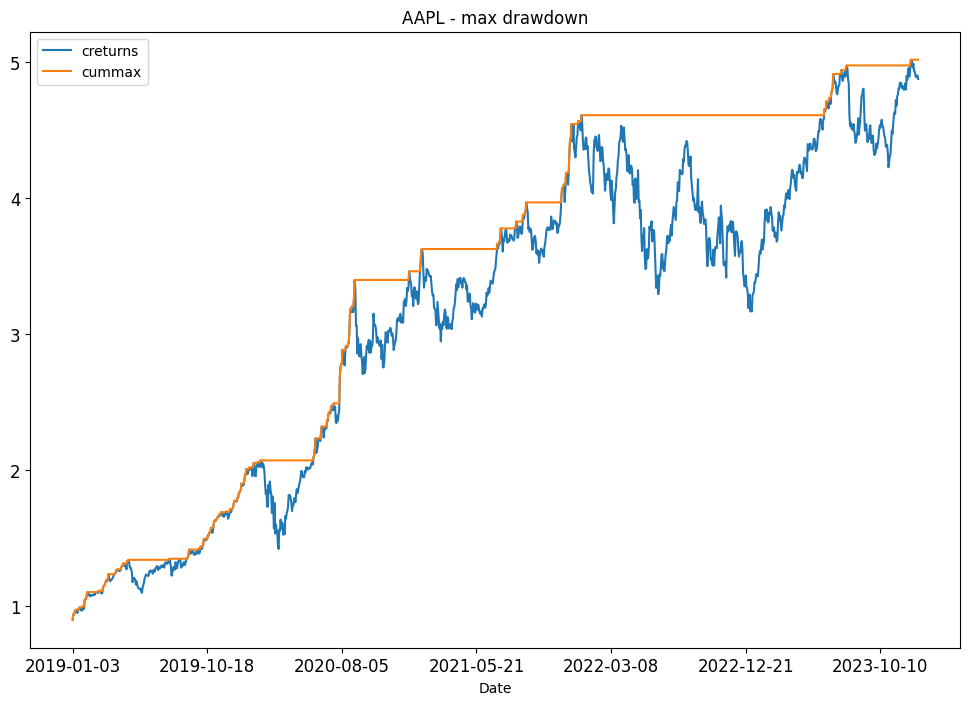

In [31]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "AAPL - max drawdown", fontsize = 12)
plt.show()

In [32]:
drawdown = df["cummax"] - df["creturns"]
drawdown

,0
Date,
2019-01-03,0.000000
2019-01-04,0.000000
2019-01-07,0.002280
2019-01-08,0.000000
2019-01-09,0.000000
...,...
2023-12-22,0.114235
2023-12-26,0.128166
2023-12-27,0.125633


In [33]:
drawdown.max()

1.4435157041540014

In [34]:
drawdown.idxmax()

'2023-01-05'

In [35]:
def wma_calc(w):
    def g(x):
        return sum(w*x)/sum(w)
    return g

In [36]:
wma_s = 50
weight_s = list(reversed([(wma_s - n)*wma_s for n in range(wma_s)]))
data["WMA_S"] = data.Price.rolling(window=wma_s).apply(wma_calc(weight_s))

In [37]:
wma_l = 200
weight_l = list(reversed([(wma_l - n)*wma_s for n in range(wma_l)]))
data["WMA_L"] = data.Price.rolling(window=wma_l).apply(wma_calc(weight_l))

In [38]:
data

,Price,WMA_S,WMA_L
Date,,,
2019-01-02,39.48,NaN,NaN
2019-01-03,35.55,NaN,NaN
2019-01-04,37.07,NaN,NaN
2019-01-07,36.98,NaN,NaN
2019-01-08,37.69,NaN,NaN
...,...,...,...
2023-12-22,193.60,190.062737,182.711075
2023-12-26,193.05,190.362784,182.854367
2023-12-27,193.15,190.655616,182.996438


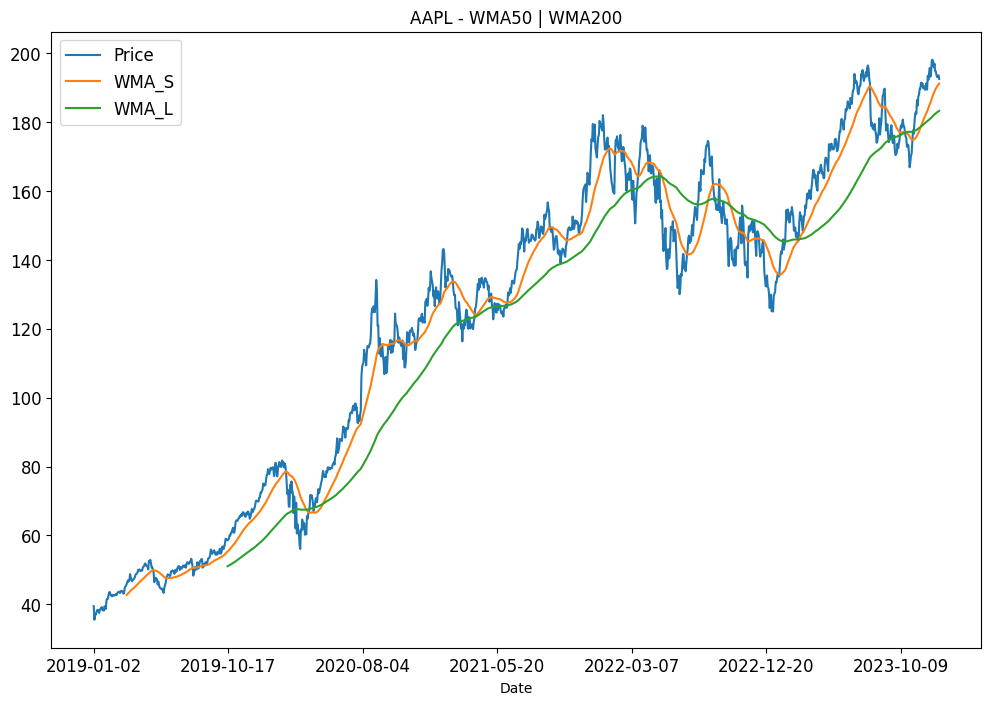

In [39]:
data.plot(figsize = (12, 8), title = "AAPL - WMA{} | WMA{}".format(wma_s, wma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [40]:
data.dropna(inplace = True)

In [41]:
data

,Price,WMA_S,WMA_L
Date,,,
2019-10-16,58.59,55.343114,51.086706
2019-10-17,58.82,55.530541,51.189959
2019-10-18,59.10,55.721843,51.295036
2019-10-21,60.13,55.947075,51.409191
2019-10-22,59.99,56.159067,51.520804
...,...,...,...
2023-12-22,193.60,190.062737,182.711075
2023-12-26,193.05,190.362784,182.854367
2023-12-27,193.15,190.655616,182.996438


In [42]:
data["position"] = np.where(data["WMA_S"] > data["WMA_L"], 1, -1 )

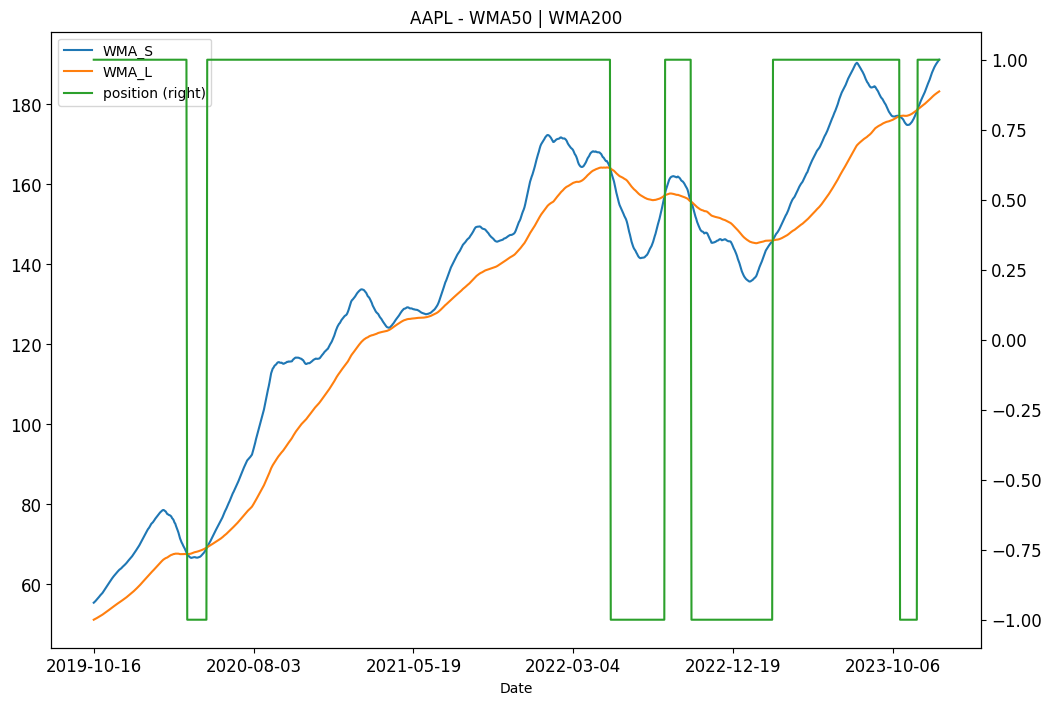

In [43]:
data.loc[:, ["WMA_S", "WMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "AAPL - WMA{} | WMA{}".format(wma_s, wma_l))
plt.show()

In [44]:
data

,Price,WMA_S,WMA_L,position
Date,,,,
2019-10-16,58.59,55.343114,51.086706,1
2019-10-17,58.82,55.530541,51.189959,1
2019-10-18,59.10,55.721843,51.295036,1
2019-10-21,60.13,55.947075,51.409191,1
2019-10-22,59.99,56.159067,51.520804,1
...,...,...,...,...
2023-12-22,193.60,190.062737,182.711075,1
2023-12-26,193.05,190.362784,182.854367,1
2023-12-27,193.15,190.655616,182.996438,1


In [45]:
data["returns"] = data.Price.pct_change()
data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
data["strategy"] = data.position.shift(1) * data["returns"]

In [46]:
data

,Price,WMA_S,WMA_L,position,returns,strategy
Date,,,,,,
2019-10-16,58.59,55.343114,51.086706,1,NaN,NaN
2019-10-17,58.82,55.530541,51.189959,1,0.003918,0.003918
2019-10-18,59.10,55.721843,51.295036,1,0.004749,0.004749
2019-10-21,60.13,55.947075,51.409191,1,0.017278,0.017278
2019-10-22,59.99,56.159067,51.520804,1,-0.002331,-0.002331
...,...,...,...,...,...,...
2023-12-22,193.60,190.062737,182.711075,1,-0.005563,-0.005563
2023-12-26,193.05,190.362784,182.854367,1,-0.002845,-0.002845
2023-12-27,193.15,190.655616,182.996438,1,0.000518,0.000518


In [47]:
data.dropna(inplace = True)

In [48]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [49]:
data

,Price,WMA_S,WMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2019-10-17,58.82,55.530541,51.189959,1,0.003918,0.003918,1.003926,1.003926
2019-10-18,59.10,55.721843,51.295036,1,0.004749,0.004749,1.008705,1.008705
2019-10-21,60.13,55.947075,51.409191,1,0.017278,0.017278,1.026284,1.026284
2019-10-22,59.99,56.159067,51.520804,1,-0.002331,-0.002331,1.023895,1.023895
2019-10-23,60.80,56.395082,51.639333,1,0.013412,0.013412,1.037720,1.037720
...,...,...,...,...,...,...,...,...
2023-12-22,193.60,190.062737,182.711075,1,-0.005563,-0.005563,3.304318,1.083839
2023-12-26,193.05,190.362784,182.854367,1,-0.002845,-0.002845,3.294931,1.080760
2023-12-27,193.15,190.655616,182.996438,1,0.000518,0.000518,3.296638,1.081320


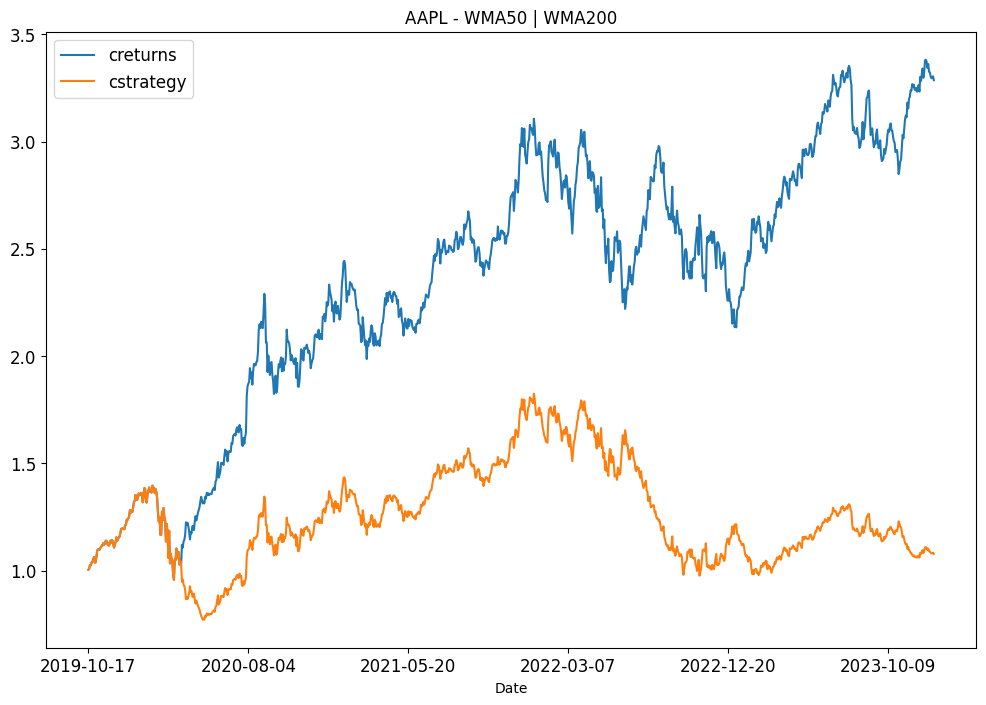

In [50]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "AAPL - WMA{} | WMA{}".format(wma_s, wma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [51]:
# def wma_calc(w):
#     def g(x):
#         return sum(w*x)/sum(w)
#     return g

# def run_strategy(WMA):
#     data = df.copy()
#     weight_s = list(reversed([(int(WMA[0]) - n)*int(WMA[0]) for n in range(int(WMA[0]))]))
#     weight_l = list(reversed([(int(WMA[1]) - n)*int(WMA[1]) for n in range(int(WMA[1]))]))
#     data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
#     data["WMA_S"] = data.Price.rolling(window=int(WMA[0])).apply(wma_calc(weight_s))
#     data["WMA_L"] = data.Price.rolling(window=int(WMA[1])).apply(wma_calc(weight_l))
#     data.dropna(inplace = True)

#     data["position"] = np.where(data["WMA_S"] > data["WMA_L"], 1, -1)
#     data["strategy"] = data.position.shift(1) * data["returns"]
#     data.dropna(inplace = True)


#     return data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [52]:
def wma_calc(w):
    def g(x):
        return sum(w*x)/sum(w)
    return g

def run_strategy(WMA):
    data = df1.copy()
    weight_s = list(reversed([(int(WMA[0]) - n)*int(WMA[0]) for n in range(int(WMA[0]))]))
    weight_l = list(reversed([(int(WMA[1]) - n)*int(WMA[1]) for n in range(int(WMA[1]))]))
    data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
    data["WMA_S"] = data.Price.rolling(window=int(WMA[0])).apply(wma_calc(weight_s))
    data["WMA_L"] = data.Price.rolling(window=int(WMA[1])).apply(wma_calc(weight_l))
    data.dropna(inplace = True)

    data["position"] = np.where(data["WMA_S"] > data["WMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [53]:
-run_strategy((50, 200))

<ipython-input-52-7c9fdb40caf9>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


1.0778488082918132

## Optimize the parameters

In [54]:
from scipy.optimize import brute

In [55]:
brute(run_strategy, ((10, 50, 1), (100, 200, 1)))

Streaming output truncated to the last 5000 lines.
<ipython-input-52-7c9fdb40caf9>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-52-7c9fdb40caf9>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-52-7c9fdb40caf9>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["

array([ 12., 111.])

In [69]:
-run_strategy((12,111))

<ipython-input-52-7c9fdb40caf9>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


2.820547609589078

----------------

## Return (01/01/2024 - 30/09/2024)

In [82]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data1 = df2.set_index('Date')
data1

,Price
Date,
2024-01-02,185.64
2024-01-03,184.25
2024-01-04,181.91
2024-01-05,181.18
2024-01-08,185.56
...,...
2024-09-24,227.37
2024-09-25,226.37
2024-09-26,227.52


In [83]:
data1["returns"] = np.log(data1.div(data1.shift(1)))

In [84]:
wma_s = 12
weight_s = list(reversed([(wma_s - n)*wma_s for n in range(wma_s)]))
data1["WMA_S"] = data1.Price.rolling(window=wma_s).apply(wma_calc(weight_s))

In [85]:
wma_l = 111
weight_l = list(reversed([(wma_l - n)*wma_s for n in range(wma_l)]))
data1["WMA_L"] = data1.Price.rolling(window=wma_l).apply(wma_calc(weight_l))

In [86]:
data1.dropna(inplace = True)

In [87]:
data1["position"] = np.where(data1["WMA_S"] > data1["WMA_L"], 1, -1 )

In [89]:
data1["returns"] = data1.Price.pct_change()
data1["returns"] = np.log(data1.Price.div(data1.Price.shift(1)))
data1["strategy"] = data1.position.shift(1) * data1["returns"]

In [90]:
data1.dropna(inplace = True)

In [91]:
data1["creturns"] = data1["returns"].cumsum().apply(np.exp)
data1["cstrategy"] = data1["strategy"].cumsum().apply(np.exp)

In [94]:
data1

,Price,returns,WMA_S,WMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2024-06-11,207.15,0.070131,196.002179,181.124934,1,0.070131,1.072649,1.072649
2024-06-12,213.07,0.028178,198.914359,181.694316,1,0.028178,1.103304,1.103304
2024-06-13,214.24,0.005476,201.710513,182.279955,1,0.005476,1.109362,1.109362
2024-06-14,212.49,-0.008202,203.926538,182.829143,1,-0.008202,1.100300,1.100300
2024-06-17,216.67,0.019481,206.501026,183.447936,1,0.019481,1.121945,1.121945
...,...,...,...,...,...,...,...,...
2024-09-24,227.37,0.003966,224.039744,217.722637,1,0.003966,1.177351,1.177351
2024-09-25,226.37,-0.004408,224.588205,218.051992,1,-0.004408,1.172173,1.172173
2024-09-26,227.52,0.005067,225.243590,218.392492,1,0.005067,1.178128,1.178128


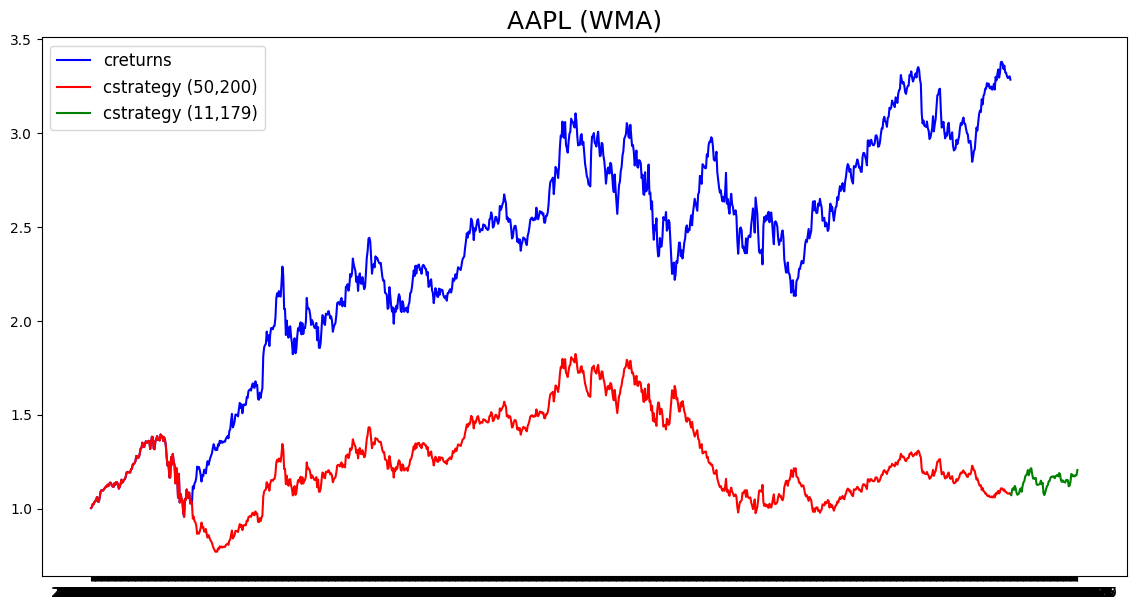

In [93]:
plt.figure(figsize=(14, 7))
plt.plot(data["creturns"], label="creturns", linestyle='-', color='b')
plt.plot(data["cstrategy"], label="cstrategy (50,200)", linestyle='-', color='r')

plt.plot(data1["cstrategy"], label="cstrategy (11,179)", linestyle='-', color='g')
plt.title("AAPL (WMA)", fontsize=18)
plt.legend(loc="best", fontsize=12)

plt.show()